http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [137]:
import pandas as pd
import numpy as np
import scipy as sc

In [201]:
from scipy import stats
from sklearn import datasets, linear_model

In [272]:
#generate independent variable
n=20
x=np.linspace(-1,1,20)
np.random.seed(20)

In [273]:
#generate dependent variable
k=2
y=x+np.random.normal(size=20)

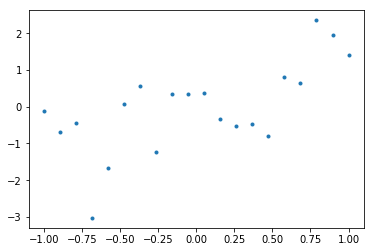

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'.')

In [275]:
data = pd.DataFrame({'x': x, 'y': y})
print(data);

           x         y
0  -1.000000 -0.116107
1  -0.894737 -0.698872
2  -0.789474 -0.431937
3  -0.684211 -3.027472
4  -0.578947 -1.663780
5  -0.473684  0.086012
6  -0.368421  0.571048
7  -0.263158 -1.241639
8  -0.157895  0.345202
9  -0.052632  0.353783
10  0.052632  0.376093
11  0.157895 -0.335516
12  0.263158 -0.528859
13  0.368421 -0.473947
14  0.473684 -0.805818
15  0.578947  0.824663
16  0.684211  0.640016
17  0.789474  2.357106
18  0.894737  1.945846
19  1.000000  1.406368


In [252]:
import statsmodels.formula.api as sm

In [253]:
model=sm.ols('y ~ x',data)

In [254]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     12.63
Date:                Fri, 14 Apr 2017   Prob (F-statistic):            0.00227
Time:                        00:45:16   Log-Likelihood:                -26.621
No. Observations:                  20   AIC:                             57.24
Df Residuals:                      18   BIC:                             59.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0209      0.216     -0.097      0.9

In [255]:
inter=results.params.Intercept

In [256]:
c=np.cov(x,y,bias=False)
print(c)

[[ 0.38781163  0.49023741]
 [ 0.49023741  1.50265727]]


In [257]:
#Here I compute the slope
slope=c[0,1]/c[0,0]
print(slope)

1.26411217468


In [258]:
#Here I compute the R2 using the correlation coefficient
R2=c[0,1]**2/(c[0,0]*c[1,1])
print(R2)

0.412412790359


In [276]:
#Here I compute the R2 using the coefficient of determination formula (would be the same as next one if ddof=0)
var_explained=np.var(slope*x,ddof=1)
var_total=np.var(y,ddof=1)
var_unexplained=np.var(results.resid,ddof=1)
R2d=var_explained/var_total
print(var_explained)
print(var_total)
print(var_unexplained)
print('R2 = ' + str(R2d))

0.619715076519
1.5026572672
0.88294219068
R2 = 0.412412790359


In [277]:
#here I compute R2 using the REAL formula
reg=np.mean((slope*x+inter-np.mean(y))**2)
tot=np.mean((y-np.mean(y))**2)
res=np.mean((y-slope*x-inter)**2)
R2e=1-res/tot
print(reg)
print(tot)
print(res)
print('R2 = ' + str(R2e))

0.588729322693
1.42752440384
0.838795081146
R2 = 0.412412790359


In [278]:
#Here I compute the adjusted R2
R2_adj=1-(1-R2)*19/18
print('R2adj =' + str(R2_adj))

R2adj =0.37976905649


In [279]:
#Here I compute the F-statistic in two ways
print(var_explained)
print(var_unexplained)
print(var_total)
#definition formula 
Fd=(var_explained/var_unexplained)*(results.df_resid/results.df_model)
#formula from Zar (p457)
#R2/1-R2=(exp/tot)/(1-exp/tot)=exp/(1-exp)
F=(R2/(1-R2))*(results.df_resid/results.df_model)
print('Fstat = ' + str(F))
print('Fstat = ' + str(Fd))

0.619715076519
0.88294219068
1.5026572672
Fstat = 12.6337505389
Fstat = 12.6337505389


In [174]:
np.sum(-results.resid**2)

-16.775901622916741

In [190]:
#AIC from log-likelihood: AIC= 2*k-2*log-likelihood  
#the likelihood-ratio test is valid only for nested models, whereas AIC (and AICc) has no such restriction
AIC=2*2-2*results.llf
print(AIC)
#correction for AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion)
AICc=AIC+2*k*(k+1)/(n-k-1)
print(AICc)

57.2417644456
57.9476467986


In [198]:
#BIC (the penalty term is larger in BIC than in AIC.)
BIC=np.log(n)*k-2*results.llf
print(BIC)

59.2332289927


In [211]:
#I also use the scikit version
regr = linear_model.LinearRegression()
x=np.reshape(x,[20,1])
x.shape
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
#Here is the R2
R2s=regr.score(x, y)
print(R2s)

0.412412790359
